In case of Elon Musk, we had just a few duplicates (See dataset_difference_test.ipynb).

In [2]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import seaborn as sb


In [3]:
# export the cleaned tweets to csv files
df_before = pd.read_csv("Clean\clean_EM_before.csv")
df_after = pd.read_csv("Clean\clean_EM_after.csv")

Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [4]:
# Subjectivity before Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity before Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_before['Subjectivity'] = df_before.Tweets.apply(subj)
df_before['Polarity'] = df_before.Tweets.apply(pol)

df_before.head(5)

,Unnamed: 0,Tweets,Subjectivity,Polarity
0,0,: “I was concerned because I saw Biden talking...,0.00,0.00
1,1,"This is her totally, keep vigilant 🙏🏻",0.75,0.00
2,2,The corruption is so obvious at this point -...,0.65,-0.40
3,3,"How does McConnell keep getting elected, es...",1.00,0.00
4,4,"If true, why ?",0.65,0.35


In [5]:
# Subjectivity after Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity after Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_after['Subjectivity'] = df_after.Tweets.apply(subj)
df_after['Polarity'] = df_after.Tweets.apply(pol)

df_after.head(5)

,Unnamed: 0,Tweets,Subjectivity,Polarity
0,0,182 376 You don't have to be 'sticking up' f...,1.000000,-1.000000
1,1,Of course you can.,0.000000,0.000000
2,2,@240gordymacd 1 Yeah yeah. I’m sure you be...,0.888889,0.500000
3,3,more gaslighting...,0.500000,0.500000
4,4,Yes and Quickly!!!!,0.500000,0.813802


Classify the tweets into different sentiment class which are Positive, Negative and Neutral.

Before Elon Musk

In [6]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_before['Sentiment'] = df_before.Polarity.apply(sentiment)
df_before.head()

,Unnamed: 0,Tweets,Subjectivity,Polarity,Sentiment
0,0,: “I was concerned because I saw Biden talking...,0.00,0.00,Neutral
1,1,"This is her totally, keep vigilant 🙏🏻",0.75,0.00,Neutral
2,2,The corruption is so obvious at this point -...,0.65,-0.40,Negative
3,3,"How does McConnell keep getting elected, es...",1.00,0.00,Neutral
4,4,"If true, why ?",0.65,0.35,Positive


After Elon Musk

In [7]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_after['Sentiment'] = df_after.Polarity.apply(sentiment)
df_after.head()

,Unnamed: 0,Tweets,Subjectivity,Polarity,Sentiment
0,0,182 376 You don't have to be 'sticking up' f...,1.000000,-1.000000,Negative
1,1,Of course you can.,0.000000,0.000000,Neutral
2,2,@240gordymacd 1 Yeah yeah. I’m sure you be...,0.888889,0.500000,Positive
3,3,more gaslighting...,0.500000,0.500000,Positive
4,4,Yes and Quickly!!!!,0.500000,0.813802,Positive


The ratio of the sentiment in both situations of Donald Trump (Before and After Elon Musk) by using scatter plot, pie plot, bar plot

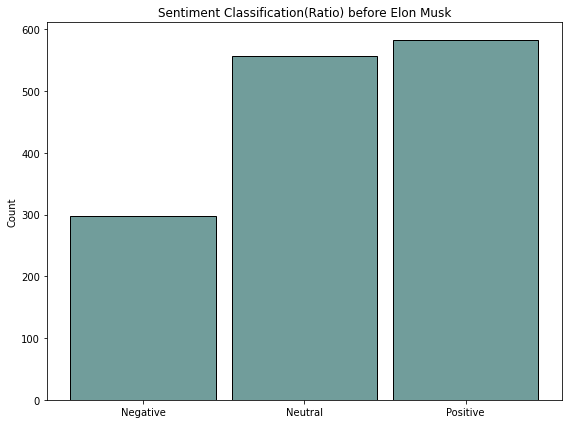

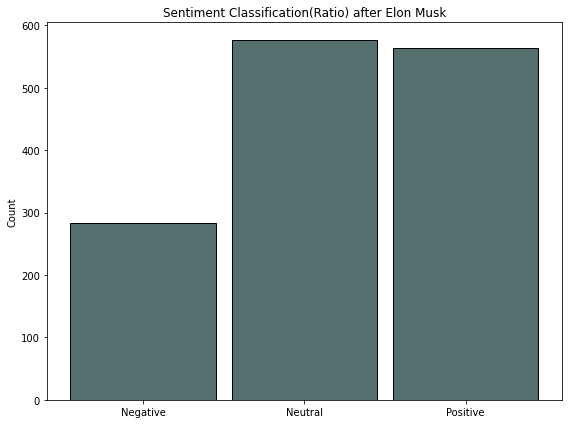

In [8]:
#The ratio of the sentiment before Elon Musk
f1 = plt.figure(figsize = (8,6))
sb.histplot(df_before.sort_values(by=['Sentiment']), x = 'Sentiment', color = '#417D7A', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) before Elon Musk')
plt.tight_layout()


#The ratio of the sentiment after Elon Musk
f2 = plt.figure(figsize = (8,6))
sb.histplot(df_after.sort_values(by=['Sentiment']), x = 'Sentiment', color = '#1B403B', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) after Elon Musk')
plt.tight_layout()

f1.savefig("Images/BeforeMuskBar.pdf", bbox_inches='tight')
f2.savefig("Images/AfterMuskBar.pdf", bbox_inches='tight')

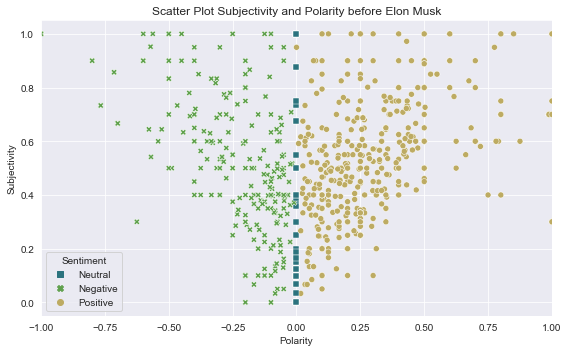

In [9]:
#Subjectivity vs Polarity in a scatter plot before Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity before Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

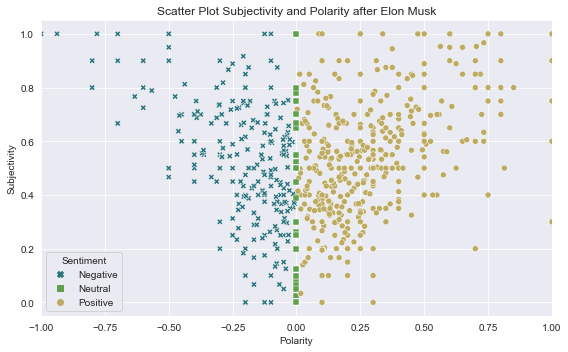

In [10]:
#Subjectivity vs Polarity in a scatter plot after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

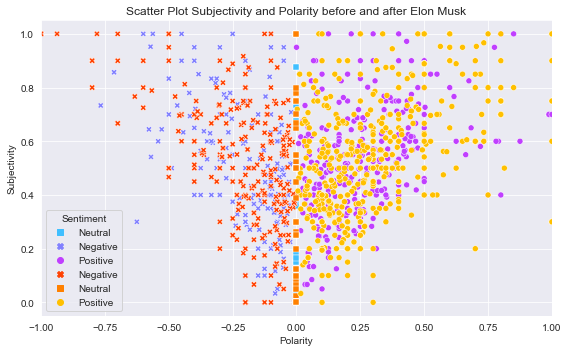

In [11]:
#Subjectivity vs Polarity in a scatter plot before and after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'cool').set(xlim=(-1,1))
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'autumn').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity before and after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()



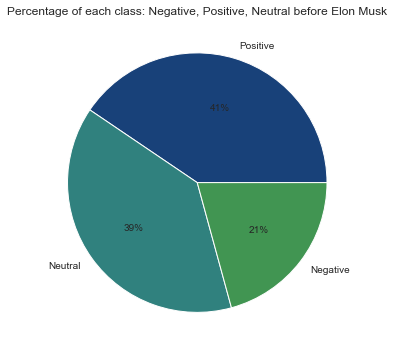

In [12]:
# The percentage of each class: Negative, Positive, Neutral before Elon Musk
 
df_sentiment_before = pd.DataFrame(df_before.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total Before Elon Musk'] = df_before.Sentiment.value_counts()
df_sentiment_before
f1 = plt.figure(figsize = (10, 5))
data = df_before['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral before Elon Musk')
plt.tight_layout()

f1.savefig("Images/BeforeMuskPie.pdf", bbox_inches='tight')


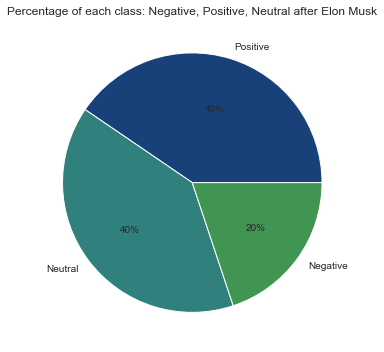

In [13]:
# The percentage of each class: Negative, Positive, Neutral after Elon Musk

df_sentiment_after = pd.DataFrame(df_after.Sentiment.value_counts(normalize=True)*100)
df_sentiment_after['Total After Elon Musk'] = df_after.Sentiment.value_counts()
df_sentiment_after
f2 = plt.figure(figsize = (10, 5))
data = df_after['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral after Elon Musk')
plt.tight_layout()

f2.savefig("Images/AfterMuskPie.pdf", bbox_inches='tight')